<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to Normal Distibution and the Z Score

---

### Learning Objectives
- Understand the Normal distribution and the concept of Normality.
- Visualize the normal distribution.
- Understand the uses of the 68-95-99.7 Rule and the z-score.
- Visualize the 69-95-99.7 Rule
- Apply z-scoring to data

### Lesson Guide
- [Review of sample statistics and parameters](#review-statistics-parameters)
- [The Normal Distribution](#normal-distribution)
- [The 68-95-99.7 Rule](#zdist-rule)
- [The z-score](#z-score)

In [1]:
import numpy as np
import scipy.stats as stats
# import seaborn as sns
import matplotlib.pyplot as plt


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='review-statistics-parameters'></a>

### Review: sample statistics and parameters

---

Recall that we use sample statistics to estimate population parameters. Our goal is to calculate sample statistics and then rely on properties of a random sample (and perhaps additional assumptions) to be able to make inferences that we generalize to the larger population of interest.

Below is a table comparing some example sample statistics and population parameters:

Metric  | Statistic  | Parameter 
------------- | --------------- | -------------
mean   | $$\bar{x} = \frac{\sum x}{n}$$ | $$ \mu = \frac{\sum x}{N} $$ 
variance | $$ s^2 = \frac{\sum_i (x_i - \bar{x})^2}{n-1} $$ | $$ \sigma^2 = \frac{\sum_i (x_i - \mu)^2}{N}  $$
standard deviation   | $$ s = \sqrt{\frac{\sum_i (x_i - \bar{x})^2}{n-1}} $$ | $$ \sigma = \sqrt{\frac{\sum_i (x_i - \mu)^2}{N} } $$

<a id='normal-distribution'></a>

### The Normal distribution

---

The Normal distribution is arguably the most commonly used distribution in all of statistics. **Normality** is an assumption that underlies many statistical tests and serves as a convenient model for the distribution of many (but not all!) variables.

The Normal distribution is parameterized by two parameters: 
- the population mean
- the population standard deviation. 

If a variable follows a Normal distribution exactly, its mean, median, and mode will all be equal.

**Example: Intelligence Quotient**

Intelligence Quotient (IQ) follows a Normal distribution by design. IQ is Normally distributed with a mean of 100 and a standard deviation of 15. You might see this specified like:
- IQ ~ Normal(100,15) 
- or IQ ~ N(100,15)

**We can plot the Normal distribution N(100, 15) using scipy.**

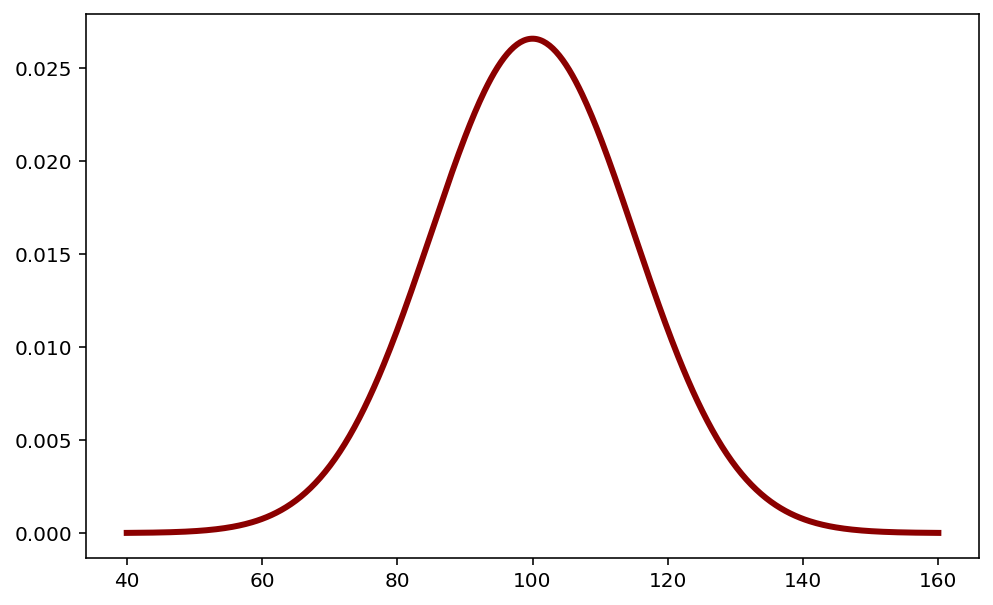

In [2]:
#generate points on the x axis:
xpoints = np.linspace(40, 160, 500)

# use stats.norm.pdf to get values on the probability density function for the Normal distribution
ypoints = stats.norm.pdf(xpoints, 100, 15)

# initialize a matplotlib "figure"
fig, ax = plt.subplots(figsize=(8,5))

# plot the lines using matplotlib's plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred');

<a id='zdist-rule'></a>

### The 68-95-99.7 Rule

---

It is often to our benefit to identify how extreme (or far away from the expected value) a particular observation is within the context of a distribution. 

For example, an extreme stock price might indicate a major shift in the market. This might inform whether we choose to buy or sell. An extreme drop in air pressure might indicate a significant weather event, necessitating a reaction from the National Weather Service. Quantifying just how extreme a particular observation is from the expected value (a.k.a. population mean) may indicate a particular action we should take.

It is possible to show that, for a Normal distribution:
- 68% of observations from a population will fall within $\pm 1$ standard deviation of the population mean
- 95% of observations from a population will fall within $\pm 2$ standard deviations of the population mean
- 99.7% of observations from a population will fall within $\pm 3$ standard deviations of the population mean.

**Check:** What percentage of individuals have an IQ between 85 and 115?

**Check:** What percentage of individuals have an IQ above 100?

**Check:** What percentage of individuals have an IQ between 85 and 130?

**Below is a visual representation of the 68-95-99.7 Rule on the IQ distribution:**

99.97073293601498 15.036311002824107


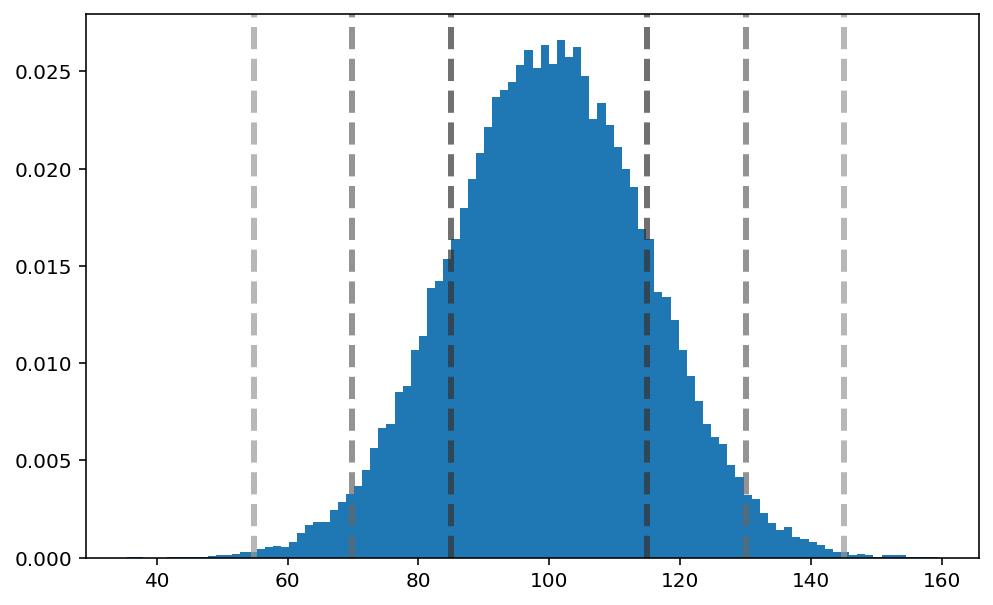

In [3]:
#Set mean and standard deviation
mu, sigma = 100, 15

#Here is a set of points
xpoints = np.random.normal(mu, sigma, 50000)

avg = np.mean(xpoints)
std = np.std(xpoints)

#check your values
print(avg,std)

#Define variables for 1,2,3 sigma
std1 = avg + std
std1_neg = avg - std
std2 = avg + 2*std
std2_neg = avg - 2*std
std3 = avg + 3*std
std3_neg = avg - 3*std

#Start Figure
#---------------------------------------
# initialize a matplotlib "figure"
fig, ax = plt.subplots(figsize=(8,5))

# 68%:
ax.axvline(std1_neg, ls='dashed', lw=3, color='#333333', alpha=0.7)
ax.axvline(std1, ls='dashed', lw=3, color='#333333', alpha=0.7)

# 95%
ax.axvline(std2_neg, ls='dashed', lw=3, color='#666666', alpha=0.7)
ax.axvline(std2, ls='dashed', lw=3, color='#666666', alpha=0.7)

# 99.7%
ax.axvline(std3, ls='dashed', lw=3, color='#999999', alpha=0.7)
ax.axvline(std3_neg, ls='dashed', lw=3, color='#999999', alpha=0.7)

# plot the lines using matplotlib's hist function:
ax.hist(xpoints, density=True, bins=100)
plt.show();

<a id='z-score'></a>

### The z-score

---

While it's nice to have this 68-95-99.7 rule, we can get more specific. 

**The z-score of an observation quantifies how many standard deviations the observation is away from the population mean:**

### $$ z_i = \frac{x_i - \text{population mean of x}}{\text{standard deviation of x}} $$

If we have **X ~ N(mu, sigma)**, with the random variable X specified by a normal distribution with mean mu and standard deviation sigma, we can specify the Z-distribution as  **Z ~ N(0,1)**. 

We call Z the **standard normal distribution** because it has a mean of 0 and standard deviation of 1.

The `scipy.stats.zscore` function will convert a vector of values to their respective z-scores.

**Calculate the z-scores for a simple vector of values:**

In [4]:
import numpy as np
values = np.array([2,3,4,5,6])

# Your code here:
stats.zscore(values)

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

**Check: Describe what the `scipy.stats.zscore` function is doing to convert the vector of values.**

In [ ]:
# Your response here:
# For each point, subtract the mean of the dataset by the standard deviation of the dataset

<a id='additional-resources'></a>

### Additional resources

---

http://blog.vctr.me/posts/central-limit-theorem.html

http://www.usablestats.com/lessons/central_limit

